In [106]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [107]:
path = Path(os.path.abspath(''))

In [108]:
train_x = np.load(str(path) + '\\train_X.npy')
train_y = np.load(str(path) + '\\train_y.npy')

test_x = np.load(str(path) + '\\test_X.npy')
test_y = np.load(str(path) + '\\test_y.npy')

In [109]:
#bo za dlugo sie liczy :c ale mozna usunac

train_samples = 1000
test_samples = 500

train_x = train_x[:train_samples]
train_y = train_y[:train_samples]

test_x = test_x[:test_samples]
test_y = test_y[:test_samples]

train_x = train_x.reshape(train_samples, 128, 130,1)
test_x = test_x.reshape(test_samples, 128, 130, 1)

In [110]:
model = Sequential()

In [111]:
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(128,130,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(11, activation='sigmoid'))

In [112]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
train_x = train_x.reshape(train_samples, 128, 130,1)
test_x = test_x.reshape(test_samples, 128, 130, 1)

In [114]:
fit = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10)

Train on 1000 samples, validate on 500 samples
Epoch 1/10
1000/1000 [==============================] - 248s 248ms/step - loss: 0.2433 - accuracy: 0.9325 - val_loss: 1.5997 - val_accuracy: 0.7238
Epoch 2/10
1000/1000 [==============================] - 246s 246ms/step - loss: 0.1052 - accuracy: 0.9604 - val_loss: 2.9474 - val_accuracy: 0.7536
Epoch 3/10
1000/1000 [==============================] - 245s 245ms/step - loss: 0.0671 - accuracy: 0.9752 - val_loss: 3.4178 - val_accuracy: 0.7453
Epoch 4/10
1000/1000 [==============================] - 246s 246ms/step - loss: 0.0485 - accuracy: 0.9821 - val_loss: 8.3044 - val_accuracy: 0.7502
Epoch 5/10
1000/1000 [==============================] - 245s 245ms/step - loss: 0.0444 - accuracy: 0.9864 - val_loss: 7.4925 - val_accuracy: 0.7542
Epoch 6/10
1000/1000 [==============================] - 245s 245ms/step - loss: 0.0380 - accuracy: 0.9890 - val_loss: 7.3377 - val_accuracy: 0.7447
Epoch 7/10
1000/1000 [==============================] - 251s 251m

In [115]:
#75% skutecznosci, to tak srednio

results = model.evaluate(test_x, test_y)
results

500/500 [==============================] - 18s 36ms/step


[11.98531470489502, 0.7461819648742676]

In [116]:
hist_dict = fit.history
hist_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [117]:
acc = hist_dict['accuracy']
val_acc = hist_dict['val_accuracy']
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

In [118]:
epochs = range(1, len(acc)+1)

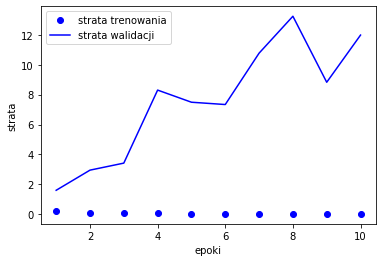

In [119]:
plt.plot(epochs, loss, 'bo', label='strata trenowania') #kropki
plt.plot(epochs, val_loss, 'b', label='strata walidacji')

plt.xlabel('epoki')
plt.ylabel('strata')
plt.legend()

plt.show()

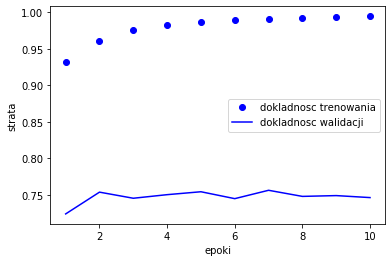

In [120]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='dokladnosc trenowania')
plt.plot(epochs,val_acc, 'b', label='dokladnosc walidacji')

plt.xlabel('epoki')
plt.ylabel('strata')
plt.legend()

plt.show()